<a href="https://colab.research.google.com/github/BhuvanChaithanya/AI-ml/blob/main/EDA_1_Titanic(logistic_regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
#missing data

<Axes: >

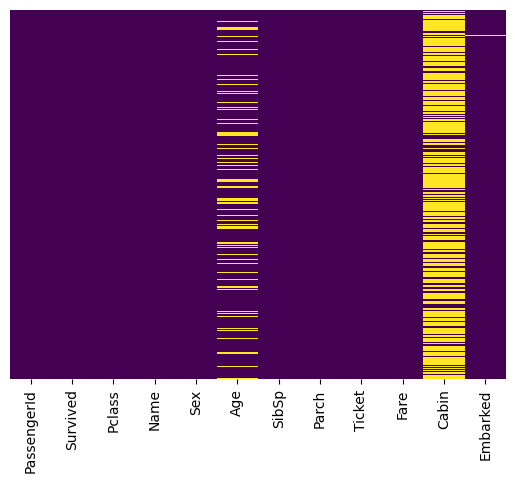

In [14]:
sns.heatmap(train.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [10]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Example data (you can replace this with your actual data)
# data = {
#     'A': [10, 30, 50, 70],
#     'B': [20, 40, 60, 80],
#     'C': [30, 50, 70, 90]
# }

# df = pd.DataFrame(data)

# # Create a heatmap with custom vmin and vmax
# plt.figure(figsize=(6, 4))
# sns.heatmap(df, cmap='coolwarm', annot=True, vmin=20, vmax=80)
# plt.title("Custom Color Range (vmin=20, vmax=80)")
# plt.show()


<ipython-input-21-50fa13d1b474>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Survived', data = train, palette = 'Set2')


<Axes: xlabel='Survived', ylabel='count'>

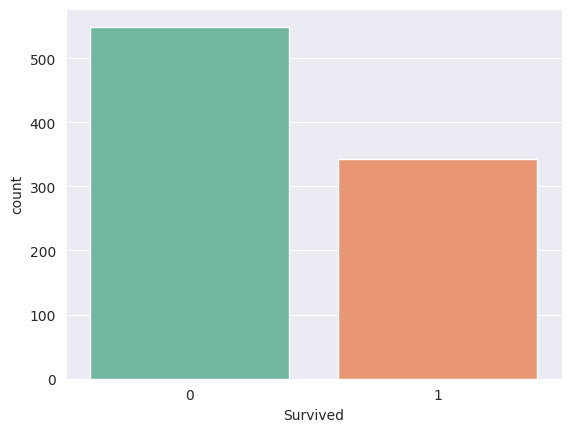

In [21]:
sns.set_style('darkgrid')
sns.countplot(x = 'Survived', data = train, palette = 'Set2')

<Axes: xlabel='Survived', ylabel='count'>

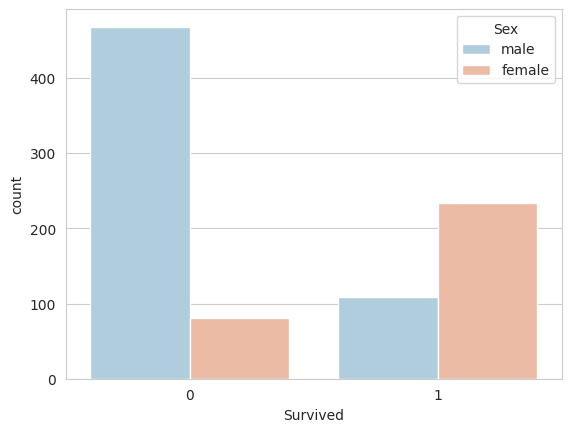

In [24]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue ='Sex', data = train, palette = 'RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

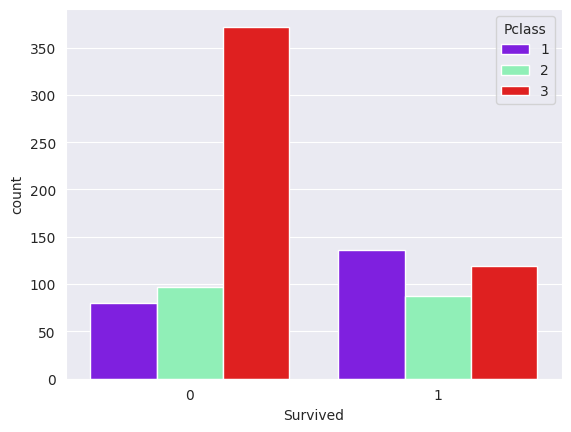

In [26]:
sns.set_style('darkgrid')
sns.countplot(x= 'Survived', hue = 'Pclass', data = train, palette = 'rainbow')

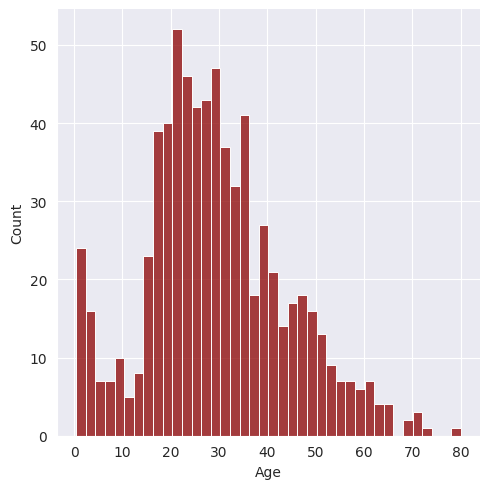

In [29]:
sns.displot(train['Age'].dropna(),kde = False, color = 'darkred', bins = 40)

<Axes: >

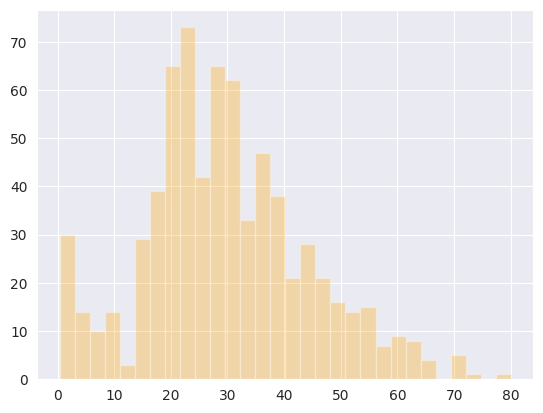

In [32]:
train['Age'].hist(bins = 30, color = 'orange',alpha = 0.3)

<Axes: xlabel='SibSp', ylabel='count'>

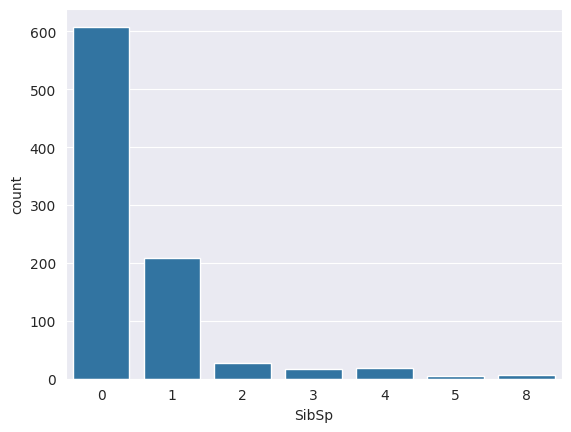

In [33]:
sns.countplot(x = 'SibSp', data = train)

<Axes: >

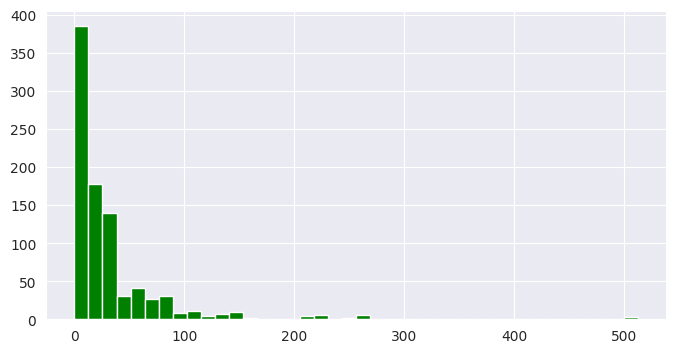

In [34]:
train['Fare'].hist(color= 'green', bins = 40, figsize = (8,4))

<ipython-input-36-ed532ef5a925>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Pclass', y = 'Age', data = train, palette = 'winter')


<Axes: xlabel='Pclass', ylabel='Age'>

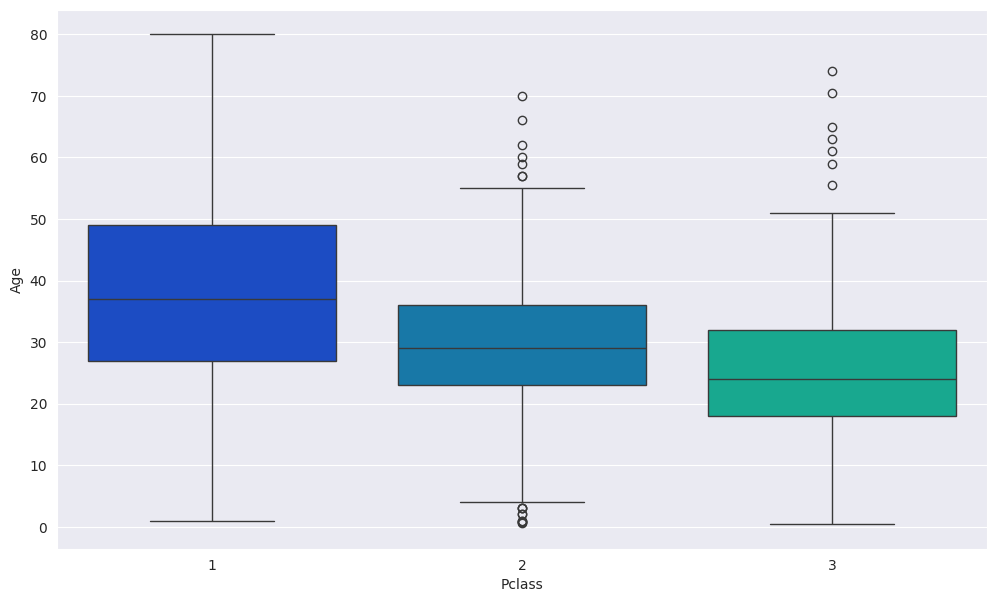

In [36]:
#data cleaning

plt.figure(figsize = (12, 7))
sns.boxplot(x = 'Pclass', y = 'Age', data = train, palette = 'winter')

In [37]:
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):

    if Pclass == 1:
      return 37

    elif Pclass == 2:
      return 29

    else:
      return 24

  else:
    return Age

In [40]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis = 1)

<Axes: >

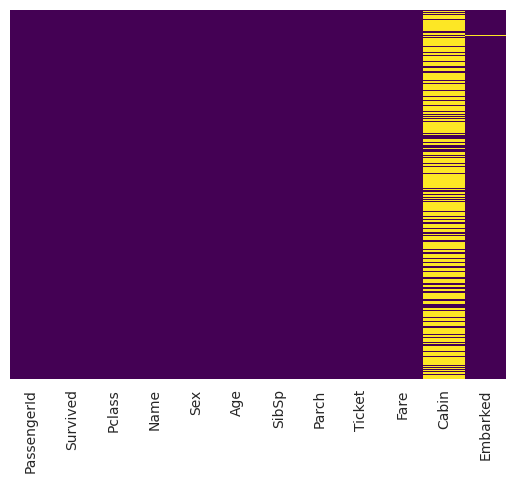

In [41]:
sns.heatmap(train.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [42]:
train.drop('Cabin', axis = 1, inplace = True)

In [43]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

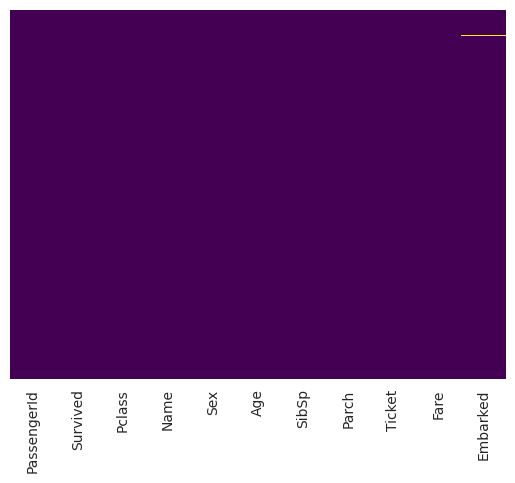

In [44]:
sns.heatmap(train.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [46]:
train.dropna(inplace = True)

<Axes: >

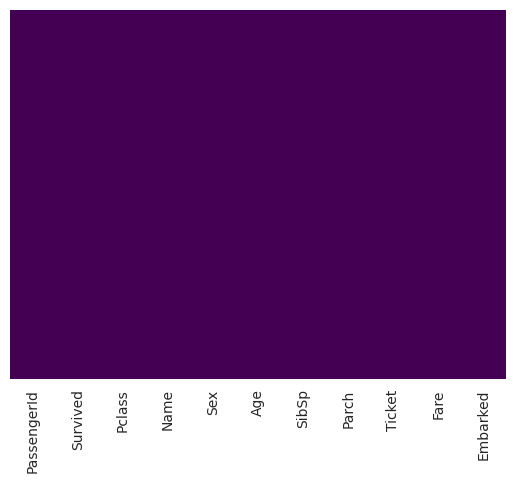

In [47]:
sns.heatmap(train.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [52]:
pd.get_dummies(train['Embarked'], drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [54]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Sex'], drop_first= True)

In [55]:
train.drop(['Sex','Embarked','Name','Ticket'], axis = 1, inplace = True)

In [56]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [57]:
train = pd.concat([train, sex, embark], axis = 1)

In [58]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,male
0,1,0,3,22.0,1,0,7.2500,1,1
1,2,1,1,38.0,1,0,71.2833,0,0
2,3,1,3,26.0,0,0,7.9250,0,0
3,4,1,1,35.0,1,0,53.1000,0,0
4,5,0,3,35.0,0,0,8.0500,1,1


In [59]:
#train test split

In [60]:
train.drop('Survived', axis = 1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,male
0,1,3,22.0,1,0,7.2500,1,1
1,2,1,38.0,1,0,71.2833,0,0
2,3,3,26.0,0,0,7.9250,0,0
3,4,1,35.0,1,0,53.1000,0,0
4,5,3,35.0,0,0,8.0500,1,1


In [61]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis = 1), train['Survived'], test_size= 0.30, random_state= 101)

In [64]:
#training and predicting

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [67]:
prediction = logmodel.predict(X_test)

In [70]:
from sklearn.metrics import confusion_matrix

In [72]:
accuracy = confusion_matrix(y_test, prediction)

In [73]:
accuracy

array([[153,  10],
       [ 43,  61]])

In [74]:
from sklearn.metrics import accuracy_score

In [75]:
accuracy

array([[153,  10],
       [ 43,  61]])

In [77]:
accuracy = accuracy_score(y_test, prediction)
accuracy

0.8014981273408239

In [78]:
prediction

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0])